本次作业以垃圾邮件分类任务为基础，要求提取文本特征并使用朴素贝叶斯算法进行垃圾邮件识别（调用已有工具包或自行实现）。

# 任务介绍
电子邮件是互联网的一项重要服务，在大家的学习、工作和生活中会广泛使用。但是大家的邮箱常常被各种各样的垃圾邮件填充了。有统计显示，每天互联网上产生的垃圾邮件有几百亿近千亿的量级。因此，对电子邮件服务提供商来说，垃圾邮件过滤是一项重要功能。而朴素贝叶斯算法在垃圾邮件识别任务上一直表现非常好，至今仍然有很多系统在使用朴素贝叶斯算法作为基本的垃圾邮件识别算法。

本次实验数据集来自[Trec06](https://plg.uwaterloo.ca/cgi-bin/cgiwrap/gvcormac/foo06)的中文垃圾邮件数据集，目录解压后包含三个文件夹，其中data目录下是所有的邮件（未分词），已分词好的邮件在data_cut目录下。邮件分为邮件头部分和正文部分，两部分之间一般有空行隔开。标签数据在label文件夹下，文件中每行是标签和对应的邮件路径。‘spam’表示垃圾邮件，‘ham’表示正常邮件。

本次实验

基本要求：
1. 提取正文部分的文本特征；
2. 划分训练集和测试集（可以借助工具包。一般笔记本就足够运行所有数据，认为实现困难或算力不够的同学可以采样一部分数据进行实验。）；
3. 使用朴素贝叶斯算法完成垃圾邮件的分类与预测，要求测试集准确率Accuracy、精准率Precision、召回率Recall均高于0.9（本次实验可以使用已有的一些工具包完成如sklearn）；
4. 对比特征数目（词表大小）对模型效果的影响；
5. 提交代码和实验报告。

扩展要求：
1. 邮件头信息有时也可以协助判断垃圾邮件，欢迎学有余力的同学们尝试；
2. 尝试自行实现朴素贝叶斯算法细节；
3. 尝试对比不同的概率计算方法。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

参考文献

* *https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction*
* *https://scikit-learn.org/stable/modules/naive_bayes.html*

获取数据集

In [2]:
label_path = './trec06c-utf8/label/index'

In [3]:
import os
import itertools

def get_text(label_path):
    """    
    return tokens, label
    """
    with open(label_path) as f:
        for line in f.readlines():
            label, path = line.split(' ')
            
            data_path_prefix = './trec06c-utf8/data_cut'
            data_path = path[8:].strip('\n')
            
            with open(os.path.join(data_path_prefix, data_path)) as data_file:
                content = data_file.read()
                # parse body part
                content = '\n'.join(content.split('\n\n')[1:])
                
                # tokenizer
                tokens = list(itertools.chain(*[p.split() for p in content.split('\n')]))

            yield ' '.join(tokens), label

In [4]:
def get_corpus(label_path, size=np.inf):
    """
    Get corpus.
    
    return corpus, labels
    """
    
    corpus = []
    labels = []

    counter = 0
    for tokens, label in get_text(label_path):
        corpus.append(tokens)
        labels.append(label)
        
        counter += 1
        if counter >= size:
            break
        
    return corpus, labels

训练语料

In [5]:
%%time 

corpus, labels = get_corpus(label_path)

CPU times: user 5.67 s, sys: 2.91 s, total: 8.58 s
Wall time: 14.4 s


In [6]:
%%time

vectorizer =CountVectorizer()
X = vectorizer.fit_transform(corpus)

CPU times: user 8.76 s, sys: 117 ms, total: 8.88 s
Wall time: 8.89 s


In [7]:
vectorizer.vocabulary_

{'一位': 56902,
 '管理': 161033,
 '技术人员': 121663,
 '清楚': 145128,
 '懂得': 118840,
 '单纯': 85596,
 '技术': 121661,
 '角度': 174573,
 '衡量': 172944,
 '合算': 90589,
 '方案': 129089,
 '也许': 65727,
 '却是': 86566,
 '一个': 56740,
 '财务': 177962,
 '陷阱': 190461,
 '表面': 173237,
 '赢利': 179050,
 '暗地里': 131988,
 '亏损': 66877,
 '使经': 72711,
 '营者': 171354,
 '无法': 129672,
 '接受': 124857,
 '如何': 102395,
 '技术手段': 121682,
 '运作': 182048,
 '相结合': 155254,
 '每位': 139546,
 '课程': 177122,
 '通过': 184355,
 '沙盘': 141664,
 '模拟': 138032,
 '案例': 137278,
 '分析': 80432,
 '企业': 70472,
 '各级': 90418,
 '掌握': 124601,
 '财务管理': 177981,
 '知识': 156378,
 '利用': 81502,
 '信息': 73479,
 '改进': 126655,
 '管理决策': 161039,
 '实现': 105299,
 '效益': 127053,
 '最大化': 132596,
 '学习': 103987,
 '会计': 71060,
 '基本': 97140,
 '了解': 66166,
 '提高': 125365,
 '日常': 130061,
 '活动': 143322,
 '可行性': 89674,
 '关键': 77270,
 '业绩': 62158,
 '指标': 123710,
 '形成': 114232,
 '战略规划': 119955,
 '全面': 76318,
 '预算': 193050,
 '突出': 159390,
 '重心': 186393,
 '系统性': 161803,
 '工作': 109351,
 '内容': 77868,
 

In [8]:
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

In [9]:
encoder.classes_, encoder.inverse_transform([0, 1])

(array(['ham', 'spam'], dtype='<U4'), array(['ham', 'spam'], dtype='<U4'))

Label:

* 0 - ham
* 1 - spam

In [10]:
print('X shape: %s, y shape: %s' % (X.shape, y.shape))

X shape: (64620, 196902), y shape: (64620,)


划分数据集

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print('Train dataset X: %s, y:%s' % (X_train.shape, y_train.shape))
print('Test  dataset X: %s, y:%s' % (X_test.shape, y_test.shape))

Train dataset X: (51696, 196902), y:(51696,)
Test  dataset X: (12924, 196902), y:(12924,)


训练模型

In [13]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

预测

In [14]:
y_pred = model.predict(X_test)

准确率、精准率和召回率

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Test accuracy: %.4f, precision: %.4f, recall: %.4f f1 score: %.4f' % (accuracy, precision, recall, f1))

Test accuracy: 0.9768, precision: 0.9843, recall: 0.9809 f1 score: 0.9826


对比特征数目对模型效果的影响

In [17]:
vocab_size = len(vectorizer.vocabulary_)

print('Vocabulary size: %d' % vocab_size)

Vocabulary size: 196902


In [18]:
feat_nums = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for feat_num in np.arange(10000, vocab_size, 500):
    model = MultinomialNB()
    model.fit(X_train[:, :feat_num], y_train)
    
    y_pred = model.predict(X_test[:, :feat_num])
    
    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    # precision
    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)
    
    # recall
    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)
    
    # f1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    
    feat_nums.append(feat_num)
    
    print('feature num: %d, accuracy: %.4f, precision: %.4f, recall: %.4f, f1 score: %.4f' % 
          (feat_num, accuracy, precision, recall, f1))

feature num: 10000, accuracy: 0.6959, precision: 0.7031, recall: 0.9431, f1 score: 0.8056
feature num: 10500, accuracy: 0.6962, precision: 0.7032, recall: 0.9437, f1 score: 0.8059
feature num: 11000, accuracy: 0.6990, precision: 0.7046, recall: 0.9461, f1 score: 0.8077
feature num: 11500, accuracy: 0.7004, precision: 0.7055, recall: 0.9467, f1 score: 0.8085
feature num: 12000, accuracy: 0.7008, precision: 0.7058, recall: 0.9467, f1 score: 0.8087
feature num: 12500, accuracy: 0.7008, precision: 0.7058, recall: 0.9467, f1 score: 0.8087
feature num: 13000, accuracy: 0.7008, precision: 0.7059, recall: 0.9466, f1 score: 0.8087
feature num: 13500, accuracy: 0.7008, precision: 0.7059, recall: 0.9466, f1 score: 0.8087
feature num: 14000, accuracy: 0.7031, precision: 0.7072, recall: 0.9482, f1 score: 0.8102
feature num: 14500, accuracy: 0.7053, precision: 0.7089, recall: 0.9483, f1 score: 0.8113
feature num: 15000, accuracy: 0.7059, precision: 0.7093, recall: 0.9485, f1 score: 0.8117
feature nu

feature num: 56000, accuracy: 0.8733, precision: 0.8494, recall: 0.9851, f1 score: 0.9122
feature num: 56500, accuracy: 0.8734, precision: 0.8495, recall: 0.9851, f1 score: 0.9123
feature num: 57000, accuracy: 0.9365, precision: 0.9293, recall: 0.9794, f1 score: 0.9537
feature num: 57500, accuracy: 0.9490, precision: 0.9458, recall: 0.9798, f1 score: 0.9625
feature num: 58000, accuracy: 0.9581, precision: 0.9590, recall: 0.9790, f1 score: 0.9689
feature num: 58500, accuracy: 0.9615, precision: 0.9637, recall: 0.9794, f1 score: 0.9715
feature num: 59000, accuracy: 0.9617, precision: 0.9642, recall: 0.9790, f1 score: 0.9716
feature num: 59500, accuracy: 0.9622, precision: 0.9647, recall: 0.9792, f1 score: 0.9719
feature num: 60000, accuracy: 0.9609, precision: 0.9649, recall: 0.9771, f1 score: 0.9709
feature num: 60500, accuracy: 0.9628, precision: 0.9674, recall: 0.9772, f1 score: 0.9723
feature num: 61000, accuracy: 0.9656, precision: 0.9716, recall: 0.9771, f1 score: 0.9743
feature nu

feature num: 101500, accuracy: 0.9753, precision: 0.9825, recall: 0.9805, f1 score: 0.9815
feature num: 102000, accuracy: 0.9755, precision: 0.9824, recall: 0.9810, f1 score: 0.9817
feature num: 102500, accuracy: 0.9757, precision: 0.9826, recall: 0.9810, f1 score: 0.9818
feature num: 103000, accuracy: 0.9756, precision: 0.9822, recall: 0.9814, f1 score: 0.9818
feature num: 103500, accuracy: 0.9755, precision: 0.9821, recall: 0.9812, f1 score: 0.9817
feature num: 104000, accuracy: 0.9755, precision: 0.9823, recall: 0.9811, f1 score: 0.9817
feature num: 104500, accuracy: 0.9758, precision: 0.9827, recall: 0.9810, f1 score: 0.9819
feature num: 105000, accuracy: 0.9757, precision: 0.9826, recall: 0.9810, f1 score: 0.9818
feature num: 105500, accuracy: 0.9764, precision: 0.9834, recall: 0.9812, f1 score: 0.9823
feature num: 106000, accuracy: 0.9763, precision: 0.9832, recall: 0.9814, f1 score: 0.9823
feature num: 106500, accuracy: 0.9763, precision: 0.9832, recall: 0.9814, f1 score: 0.9823

feature num: 147000, accuracy: 0.9764, precision: 0.9841, recall: 0.9805, f1 score: 0.9823
feature num: 147500, accuracy: 0.9774, precision: 0.9840, recall: 0.9822, f1 score: 0.9831
feature num: 148000, accuracy: 0.9777, precision: 0.9844, recall: 0.9822, f1 score: 0.9833
feature num: 148500, accuracy: 0.9779, precision: 0.9846, recall: 0.9824, f1 score: 0.9835
feature num: 149000, accuracy: 0.9779, precision: 0.9846, recall: 0.9824, f1 score: 0.9835
feature num: 149500, accuracy: 0.9778, precision: 0.9844, recall: 0.9823, f1 score: 0.9834
feature num: 150000, accuracy: 0.9779, precision: 0.9844, recall: 0.9824, f1 score: 0.9834
feature num: 150500, accuracy: 0.9779, precision: 0.9846, recall: 0.9823, f1 score: 0.9834
feature num: 151000, accuracy: 0.9776, precision: 0.9846, recall: 0.9818, f1 score: 0.9832
feature num: 151500, accuracy: 0.9776, precision: 0.9846, recall: 0.9818, f1 score: 0.9832
feature num: 152000, accuracy: 0.9775, precision: 0.9846, recall: 0.9817, f1 score: 0.9831

feature num: 192500, accuracy: 0.9768, precision: 0.9841, recall: 0.9811, f1 score: 0.9826
feature num: 193000, accuracy: 0.9767, precision: 0.9841, recall: 0.9810, f1 score: 0.9825
feature num: 193500, accuracy: 0.9766, precision: 0.9840, recall: 0.9810, f1 score: 0.9825
feature num: 194000, accuracy: 0.9767, precision: 0.9841, recall: 0.9810, f1 score: 0.9825
feature num: 194500, accuracy: 0.9767, precision: 0.9841, recall: 0.9810, f1 score: 0.9825
feature num: 195000, accuracy: 0.9768, precision: 0.9842, recall: 0.9810, f1 score: 0.9826
feature num: 195500, accuracy: 0.9766, precision: 0.9841, recall: 0.9809, f1 score: 0.9825
feature num: 196000, accuracy: 0.9766, precision: 0.9841, recall: 0.9809, f1 score: 0.9825
feature num: 196500, accuracy: 0.9767, precision: 0.9842, recall: 0.9809, f1 score: 0.9825


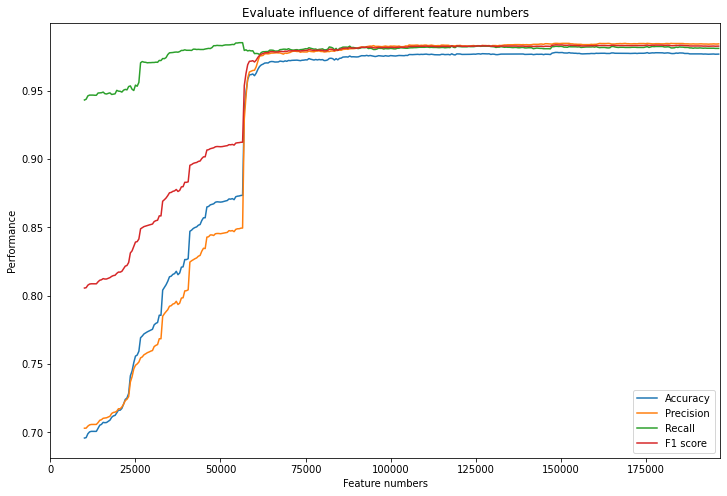

In [19]:
fig, axes = plt.subplots(figsize=(12, 8))
axes.plot(feat_nums, accuracy_scores, label='Accuracy')
axes.plot(feat_nums, precision_scores, label='Precision')
axes.plot(feat_nums, recall_scores, label='Recall')
axes.plot(feat_nums, f1_scores, label='F1 score')
axes.set_xlabel('Feature numbers')
axes.set_ylabel('Performance')
axes.set_xlim(0, vocab_size)
_ = axes.set_title('Evaluate influence of different feature numbers')
axes.legend()

不同模型的评估

In [20]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB

In [25]:
models = [
#     ('gaussian nb', GaussianNB), # do not support sparse matrix, need X.toarray()
    ('multinomial nb', MultinomialNB),
    ('complement nb', ComplementNB),
    ('bernouli nb', BernoulliNB),
]

for name, model_cls in models:
    model = model_cls()
    model.fit(X_train, y_train)

    f1 = f1_score(y_test, model.predict(X_test))
    print('model: %s, f1 score: %.4f' % (name, f1))

model: multinomial nb, f1 score: 0.9826
model: complement nb, f1 score: 0.9797
model: bernouli nb, f1 score: 0.9572
